In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime

In [67]:
dvd_df = pd.read_csv("python_panada_learning/time-series_plot.csv")

In [14]:
dvd_df.head(10)

,country,payment_date,total_amount_of_each_day
0,China,2007-04-30,2.99
1,Canada,2007-03-01,0.99
2,United States,2007-03-23,4.99
3,Philippines,2007-04-28,2.99
4,Japan,2007-02-21,0.99
5,Turkey,2007-04-28,1.99
6,Mexico,2007-03-02,3.99
7,Mexico,2007-03-18,7.99
8,Chile,2007-03-01,2.99
9,Mozambique,2007-03-23,4.99


['United States', 'Ecuador', 'Peru']
['United States' 'Ecuador' 'Peru']
United States    90
Ecuador          90
Peru             90
Name: country, dtype: int64


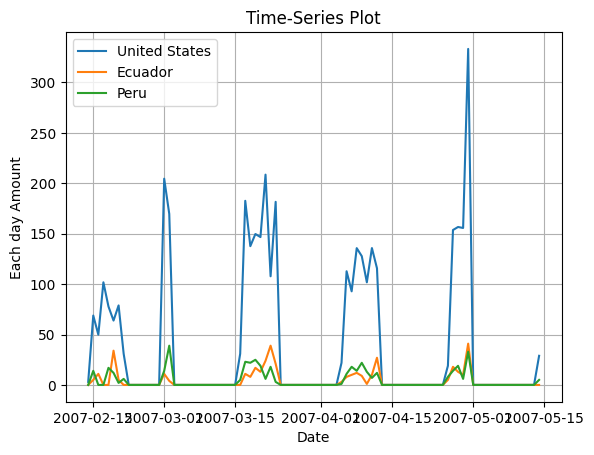

In [111]:
# finding 3 target country
country_list = dvd_df["country"].unique()
#random_countries = ['Zambia', 'Poland', 'Gambia']
random_countries = random.sample(list(country_list), 3)
print(random_countries)
# filling up the date with null value 
max_date = pd.to_datetime(dvd_df['payment_date'].max())
min_date = pd.to_datetime(dvd_df['payment_date'].min())
start_date= min_date.strftime('%Y-%m-%d')
end_date = max_date.strftime('%Y-%m-%d')


df = pd.DataFrame(columns=["country", "payment_date", "total_amount_of_each_day"])
for country in random_countries:
    selected_dvd_df= dvd_df[dvd_df['country'] == country]    
    for i in range((np.datetime64(end_date) - np.datetime64(start_date)).astype(int) + 1):
        payment_date = np.datetime64(start_date) + np.timedelta64(i, 'D')
        #print(payment_date) 
        selected_rows = selected_dvd_df[selected_dvd_df['payment_date'] == str(payment_date)]
    
        if not selected_rows.empty:
            # Append selected_rows to df
            df = pd.concat([df, selected_rows])
        else:
            df = pd.concat([df, pd.DataFrame({'country': [country], 'payment_date': [str(payment_date)], 'total_amount_of_each_day': [0]})], ignore_index=True)
    
#print(selected_rows)
distinct_countries = df['country'].unique()
print(distinct_countries)
country_counts = df['country'].value_counts()
print(country_counts)

df['payment_date'] = pd.to_datetime(df['payment_date'])
df.set_index('payment_date', inplace=True)

# Create the time-series plot
countries = df['country'].unique()

for country in countries:
    country_data = df[df['country'] == country]
    plt.plot(country_data.index, country_data['total_amount_of_each_day'], label=country)

plt.xlabel('Date')
plt.ylabel('Each day Amount')
plt.title('Time-Series Plot')
plt.legend()
plt.grid(True)
plt.show()


select * from payment

TO_CHAR(payment_date, 'YYYY-MM-DD') as
SELECT country.country, DATE(payment_date) as payment_date, SUM(p.amount) AS total_amount_of_each_day
FROM payment p 
LEFT JOIN customer cust ON p.customer_id = cust.customer_id
LEFT JOIN address a ON a.address_id = cust.address_id
LEFT JOIN city c ON a.city_id = c.city_id 
LEFT JOIN country ON c.country_id = country.country_id
GROUP BY country.country, DATE(payment_date)
ORDER BY country DESC


In [49]:
cr_df = pd.read_csv("python_panada_learning/Country_revenue.csv")

              country2  country_revenue
0            Argentina          1298.80
1               Brazil          2919.19
2                China          5251.03
3                India          6034.78
4            Indonesia          1352.69
5                Japan          3122.51
6               Mexico          2984.82
7              Nigeria          1314.92
8                Other         26864.18
9          Philippines          2219.70
10  Russian Federation          2765.62
11              Turkey          1498.49
12       United States          3685.31


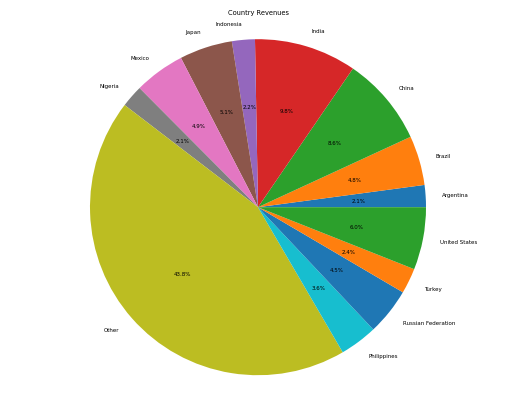

In [51]:
total_revenue = cr_df['country_revenue'].sum()

#cr_df['country2'] = cr_df.apply(lambda row: row['country'] if row['country_revenue'] > (0.02 * total_revenue) else 'Other', axis=1)


####pie chart config

conditions = [
    False,
    (cr_df['country_revenue']/total_revenue > 0.02)
]

choices = [
    False,
    cr_df['country']
]
#cr_df['country2'] = cr_df['country']
cr_df['country2'] = np.select(conditions, choices, default="Other")
cr_df.head(20)
grouped_df = cr_df.groupby('country2')['country_revenue'].sum().reset_index()
print(grouped_df)

#cr_edited_df = pd.DataFrame(columns=["country", "Country_revenue"])
#cr_edited_df = pd.concat([df, pd.DataFrame({'country': [country], 'payment_date': [str(payment_date)], 'total_amount_of_each_day': [0]})], ignore_index=True)
    
# Create the pie chart
plt.pie(grouped_df['country_revenue'], labels=grouped_df['country2'], autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Country Revenues')

# Show the chart
plt.show()


In [19]:
ae_df = pd.read_csv("python_panada_learning/Top_10_actor_earn.csv")
ae_df.head(10)

,actor_id,full_name,payment
0,107,Gina Degeneres,79532.23
1,181,Matthew Carrey,72603.54
2,144,Angela Witherspoon,70619.98
3,198,Mary Keitel,70312.61
4,102,Walter Torn,66798.11
5,150,Jayne Nolte,65746.13
6,60,Henry Berry,64512.92
7,90,Sean Guiness,64386.51
8,37,Val Bolger,63895.41
9,23,Sandra Kilmer,63886.39


SELECT full_name, payment
FROM (
    SELECT CONCAT(a.first_name, ' ', a.last_name) AS full_name, SUM(p.amount) AS payment
    FROM payment p 
    LEFT JOIN rental r ON p.customer_id = r.customer_id
    LEFT JOIN inventory i ON i.inventory_id = r.inventory_id
    LEFT JOIN film f ON f.film_id = i.film_id 
    LEFT JOIN film_actor fm ON fm.film_id = f.film_id
    LEFT JOIN actor a ON fm.actor_id = a.actor_id
    GROUP BY full_name
) subquery
WHERE full_name IS NOT NULL
ORDER BY payment DESC
LIMIT 10;

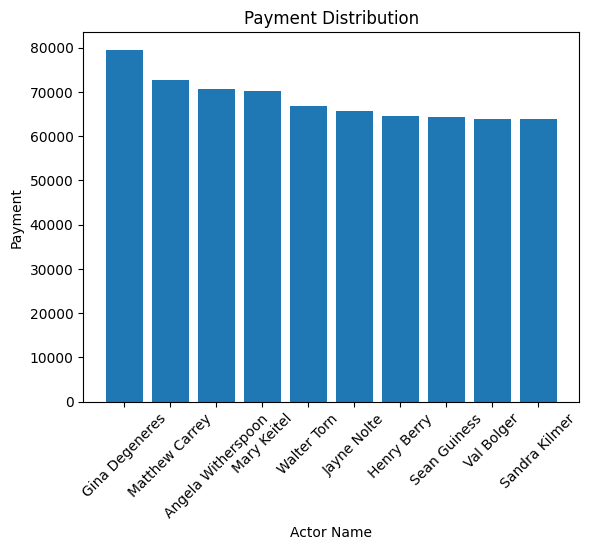

In [20]:
# Plot the bar chart
plt.bar(ae_df['full_name'], ae_df['payment'])
plt.xlabel('Actor Name')
plt.ylabel('Payment')
plt.title('Payment Distribution')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

plt.show()

Then I wanna find the 10 highest revenve generated movie from each of these actor.

1)create new table 
SELECT actor_id,full_name INTO highest_earn_actor FROM(
SELECT a.actor_id, CONCAT(a.first_name, ' ', a.last_name) AS full_name, SUM(p.amount) AS payment
FROM payment p 
LEFT JOIN rental r ON p.customer_id = r.customer_id
LEFT JOIN inventory i ON i.inventory_id = r.inventory_id
LEFT JOIN film f ON f.film_id = i.film_id 
LEFT JOIN film_actor fm ON fm.film_id = f.film_id
LEFT JOIN actor a ON fm.actor_id = a.actor_id
GROUP BY full_name,a.actor_id
HAVING CONCAT(a.first_name, ' ', a.last_name) IS NOT NULL
ORDER BY payment DESC
LIMIT 10) subquery

2) generated new csv with:
SELECT * FROM 
(SELECT full_name, payment,title,
RANK() OVER (PARTITION BY full_name ORDER BY MAX(payment) DESC) AS rental_rank
FROM (
    SELECT CONCAT(a.first_name, ' ', a.last_name) AS full_name,f.title, SUM(p.amount) AS payment
    FROM payment p 
    LEFT JOIN rental r ON p.customer_id = r.customer_id
    LEFT JOIN inventory i ON i.inventory_id = r.inventory_id
    LEFT JOIN film f ON f.film_id = i.film_id 
    LEFT JOIN film_actor fm ON fm.film_id = f.film_id
    LEFT JOIN actor a ON fm.actor_id = a.actor_id
	INNER JOIN highest_earn_actor hea ON hea.actor_id = a.actor_id
    GROUP BY CONCAT(a.first_name, ' ', a.last_name), f.title
) subquery
WHERE full_name IS NOT NULL
GROUP BY full_name, payment,title
ORDER BY full_name, rental_rank ASC) abc
where rental_rank <=10;

In [21]:
actor_movie_df = pd.read_csv("python_panada_learning/Top_10_actor_top_10_movie.csv")
actor_movie_df.head(5)

,full_name,payment,title,rental_rank
0,Angela Witherspoon,3420.00,Pulp Beverly,1
1,Angela Witherspoon,3194.28,Rush Goodfellas,2
2,Angela Witherspoon,3156.63,Chance Resurrection,3
3,Angela Witherspoon,3117.67,Cat Coneheads,4
4,Angela Witherspoon,2908.79,Detective Vision,5


In [22]:
for index, row in ae_df.iterrows():
    full_name = row['full_name']
    payment = row['payment']
    sum_of_10_movie = actor_movie_df.groupby('full_name')['payment'].sum()
    actor_movie_df = pd.concat([actor_movie_df, pd.DataFrame({'full_name': [full_name], 'payment': [payment], 'title': 'Other', 'rental_rank': np.nan})], ignore_index=True)


          full_name   payment              title  rental_rank
10   Gina Degeneres   3259.37          Wife Turn          1.0
11   Gina Degeneres   3178.42  Goodfellas Salute          2.0
12   Gina Degeneres   3128.60     Deer Virginian          3.0
13   Gina Degeneres   3107.70       Dogma Family          4.0
14   Gina Degeneres   3036.93  Movie Shakespeare          5.0
15   Gina Degeneres   3022.33   Telegraph Voyage          6.0
16   Gina Degeneres   3007.63    Storm Happiness          7.0
17   Gina Degeneres   2901.23   Metal Armageddon          8.0
18   Gina Degeneres   2775.40        Hyde Doctor          9.0
19   Gina Degeneres   2656.83  Coneheads Smoochy         10.0
100  Gina Degeneres  79532.23              Other          NaN


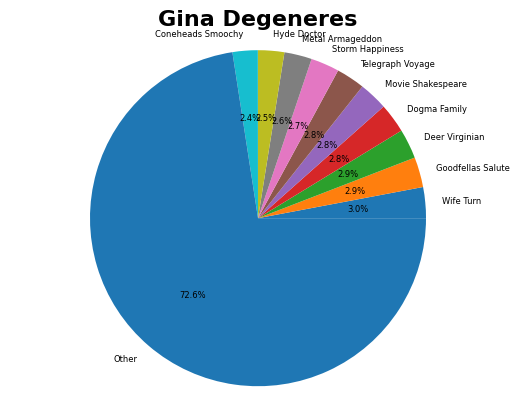

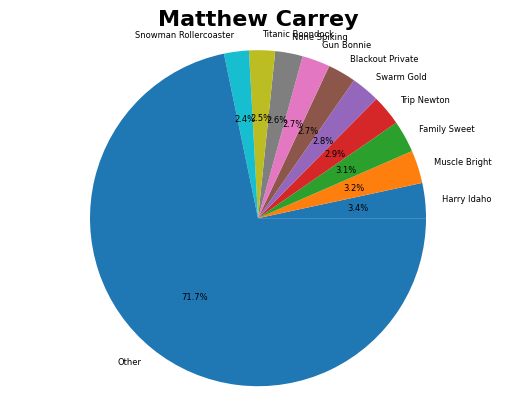

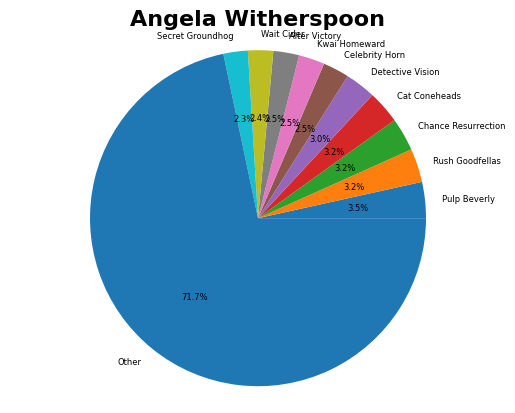

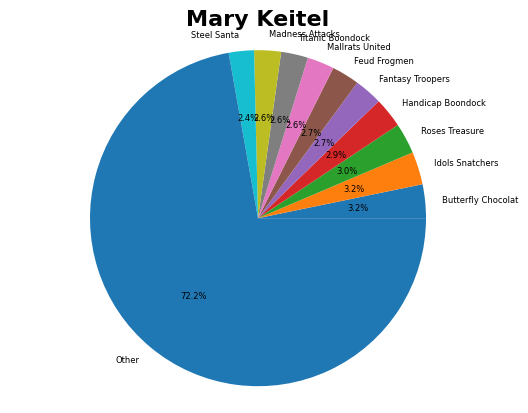

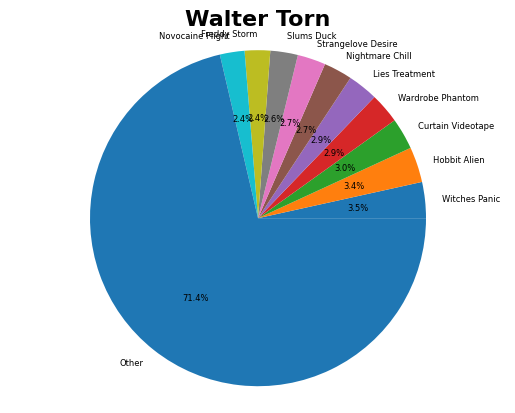

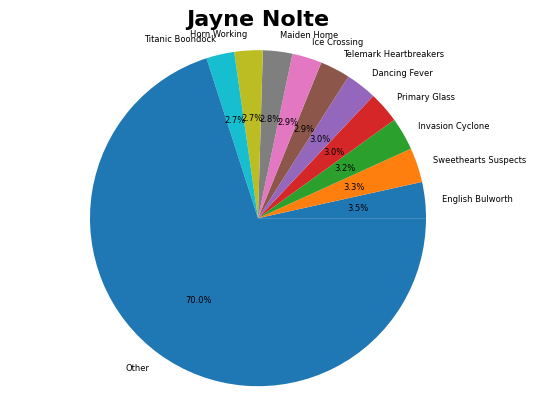

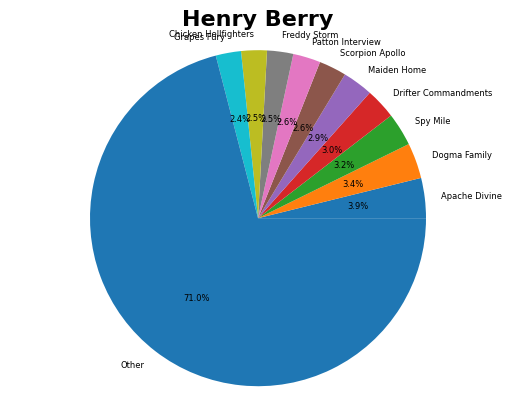

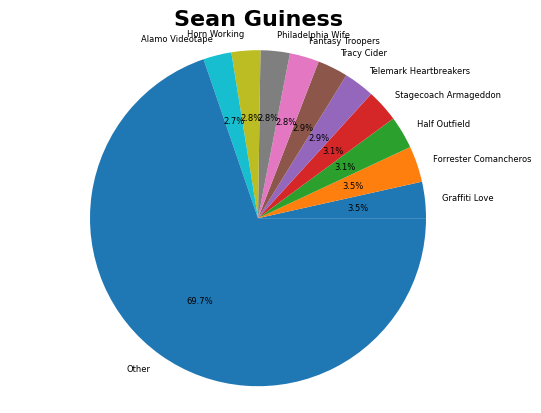

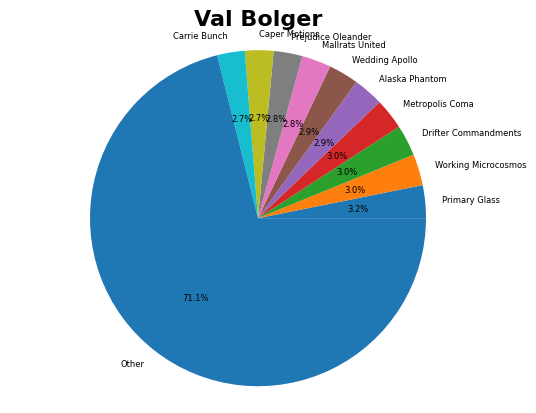

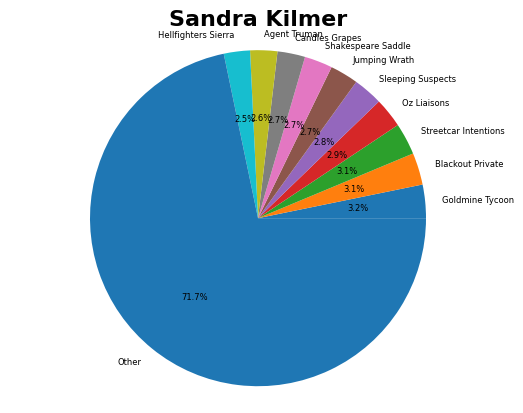

In [34]:
title_font = {'fontsize': 16, 'fontweight': 'bold'}
autopct_font = {'fontsize': 6}
for index, row in ae_df.iterrows():
    selected_rows = actor_movie_df[actor_movie_df['full_name'] == row['full_name']]
    plt.pie(selected_rows['payment'], labels=selected_rows['title'], autopct='%1.1f%%', textprops=autopct_font)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(row['full_name'], fontdict=title_font)


# Show the chart
    plt.show()

In [56]:
country_continent = {
    "Afghanistan": "Asia",
    "Algeria": "Africa",
    "American Samoa": "Oceania",
    "Angola": "Africa",
    "Anguilla": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Belarus": "Europe",
    "Bolivia": "South America",
    "Brazil": "South America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Congo": "Africa",
    "Czech Republic": "Europe",
    "Dominican Republic": "North America",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "Estonia": "Europe",
    "Ethiopia": "Africa",
    "Faroe Islands": "Europe",
    "Finland": "Europe",
    "France": "Europe",
    "French Guiana": "South America",
    "French Polynesia": "Oceania",
    "Gambia": "Africa",
    "Germany": "Europe",
    "Greece": "Europe",
    "Greenland": "North America",
    "Holy See (Vatican City State)": "Europe",
    "Hong Kong": "Asia",
    "Hungary": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Israel": "Asia",
    "Italy": "Europe",
    "Japan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kuwait": "Asia",
    "Latvia": "Europe",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Mexico": "North America",
    "Moldova": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar": "Asia",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nigeria": "Africa",
    "North Korea": "Asia",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Puerto Rico": "North America",
    "Romania": "Europe",
    "Réunion": "Africa",
    "Russian Federation": "Europe",
    "Saint Vincent and the Grenadines": "North America",
    "Saudi Arabia": "Asia",
    "Senegal": "Africa",
    "Slovakia": "Europe",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
        "Sweden": "Europe",
    "Switzerland": "Europe",
    "Taiwan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Tonga": "Oceania",
    "Tunisia": "Africa",
    "Turkey": "Asia",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Virgin Islands, U.S.": "North America",
    "Yemen": "Asia",
    "Zambia": "Africa"
}

country_continent_df = pd.DataFrame(list(country_continent.items()), columns=["country", "Continent"])
country_continent_df.head(10)

,country,Continent
0,Afghanistan,Asia
1,Algeria,Africa
2,American Samoa,Oceania
3,Angola,Africa
4,Anguilla,North America
5,Argentina,South America
6,Armenia,Asia
7,Australia,Oceania
8,Austria,Europe
9,Azerbaijan,Asia


In [58]:
cr_merge_df = pd.read_csv("python_panada_learning/Country_revenue.csv")

print(cr_merge_df)
print(country_continent_df)
merged_df = pd.merge(country_continent_df, cr_merge_df, on= "country", how = 'outer')

merged_df.head(20)

                              country  country_revenue
0                               India          6034.78
1                               China          5251.03
2                       United States          3685.31
3                               Japan          3122.51
4                              Mexico          2984.82
..                                ...              ...
103                       Afghanistan            67.82
104                             Tonga            64.84
105  Saint Vincent and the Grenadines            64.82
106                         Lithuania            63.78
107                    American Samoa            47.85

[108 rows x 2 columns]
                  country      Continent
0             Afghanistan           Asia
1                 Algeria         Africa
2          American Samoa        Oceania
3                  Angola         Africa
4                Anguilla  North America
..                    ...            ...
103             Venezuela  So

,country,Continent,country_revenue
0,Afghanistan,Asia,67.82
1,Algeria,Africa,349.18
2,American Samoa,Oceania,47.85
3,Angola,Africa,187.55
4,Anguilla,North America,99.68
5,Argentina,South America,1298.80
6,Armenia,Asia,118.75
7,Australia,Oceania,NaN
8,Austria,Europe,284.30
9,Azerbaijan,Asia,198.53
